In [3]:
import matplotlib.pyplot as plt
import numpy as np

import skimage.io as imgio
import skimage.color as imgcolor


In [ ]:
!wget lalussoft.com/mldemos/img_rgb_1.jpg
!wget lalussoft.com/mldemos/img_rgb_2.jpg
!wget lalussoft.com/mldemos/img_rgb_3.jpg

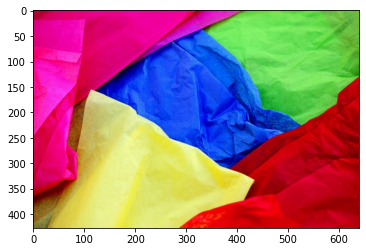

In [8]:
#se lee la imagen con la libreria img
img  = imgio.imread("img_rgb_1.jpg")
plt.imshow(img)

In [9]:
#el tipo de dato es ndarray
type(img)

numpy.ndarray

In [11]:
img.shape #427 filas, 640 columnas, 3 canales de color

(427, 640, 3)

In [13]:
print("canales de color: ", img.shape[2]) #el color esta en la posicion 2

canales de color:  3


In [14]:
nombre_canal = ["R","G","B"]

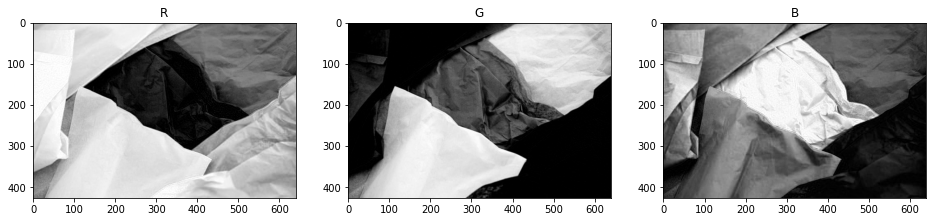

In [19]:
plt.figure(figsize=(16,10))
for i in range(3): #se recorren los canales
  canal= img[:,:,i] #todas las filas y columnas, el iterador es el canal
  plt.subplot(1,3,i+1);
  plt.imshow(canal,cmap="gray")
  plt.title(nombre_canal[i])

otra imagen

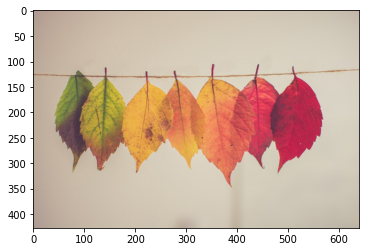

In [20]:
img  = imgio.imread("img_rgb_2.jpg")
plt.imshow(img)

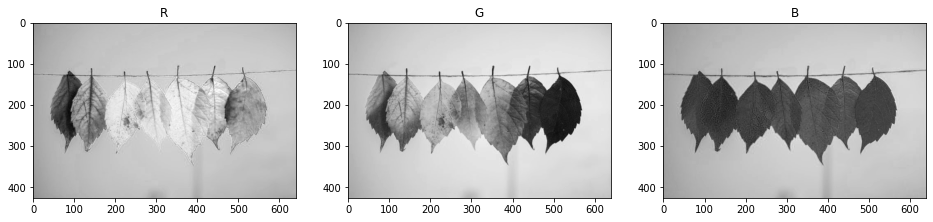

In [21]:
plt.figure(figsize=(16,10))
for i in range(3): #se recorren los canales
  canal= img[:,:,i] #todas las filas y columnas, el iterador es el canal
  plt.subplot(1,3,i+1);
  plt.imshow(canal,cmap="gray")
  plt.title(nombre_canal[i])

otra imagen

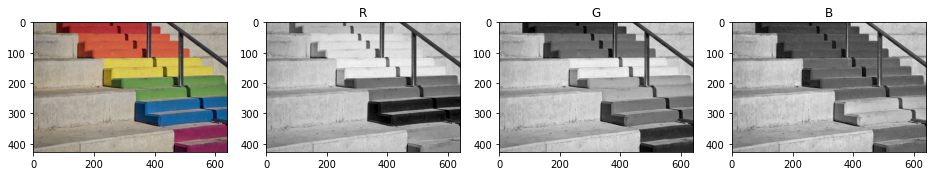

In [24]:
img  = imgio.imread("img_rgb_3.jpg")

plt.figure(figsize=(16,10))
plt.subplot(1,4,1);
plt.imshow(img)


for i in range(3): #se recorren los canales
  canal= img[:,:,i] #todas las filas y columnas, el iterador es el canal
  plt.subplot(1,4,i+2);
  plt.imshow(canal,cmap="gray")
  plt.title(nombre_canal[i])

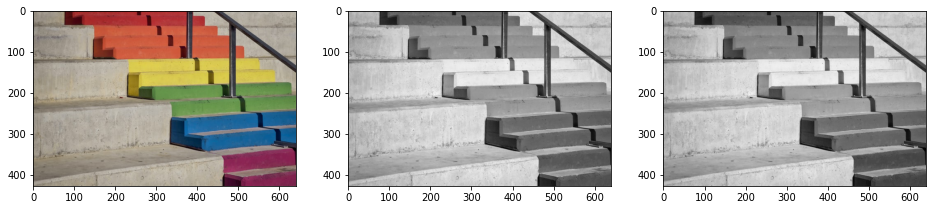

In [32]:
image_en_gris = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

#utilizando CIE wikipedia
image_en_gris_2 = 0.2126*img[:,:,0] + 0.7152*img[:,:,1] + 0.0722*img[:,:,2]

#ploteando
plt.figure(figsize=(16,10))

plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
plt.imshow(image_en_gris, cmap="gray")

plt.subplot(1,3,3)
plt.imshow(image_en_gris_2, cmap="gray")

In [33]:
import skimage.transform as imgt

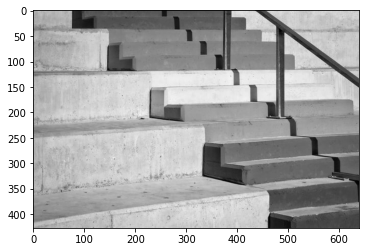

In [40]:
#en escala de grises usando la libreria transform
imgg = imgcolor.rgb2gray(img)
plt.imshow(imgg,cmap="gray")

In [41]:
imgg2 = (imgg*255).astype(np.uint8)

In [42]:
np.max(imgg2)

215

In [43]:
img.shape

(427, 640, 3)

nuevas dimensiones:  (21, 32, 3)


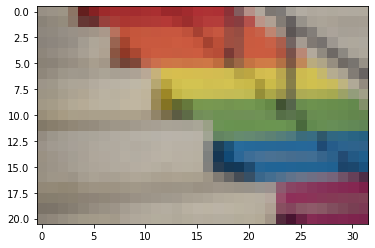

In [46]:
i = imgt.rescale(img,0.05, multichannel=True)
plt.imshow(i)
print("nuevas dimensiones: ",i.shape)

In [57]:
imgg.shape

(427, 640)

Filtros

In [71]:
def filtrar(m,filtro):
  mr = np.multiply(m,filtro)
  return min( max(sum(sum(mr)),0), 255)

def convolucion(imagen,filtro): #asume imagen 2D, filtro 3x3
  r = np.zeros(imagen.shape)
  f,c = imagen.shape

  for i in range(f-2):
    for j in range(c-2):
      r[i,j] = filtrar(imagen[1:i+3,j:j+3], filtro)
  return r

In [59]:
#filtro horizontal de sobel
fh = np.array([
              [-1,-2,-1],
              [0, 0, 0],
              [1, 2, 1] 
])

In [68]:
resultadofh = convolucion(img,fh)
plt.imshow(resultadofh,cmap="gray")

TypeError: ignored